In [866]:
import numpy
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
numpy.random.seed(10)

In [867]:
all_df = pd.read_csv("data/bank.csv")

In [868]:
cols=['age','balance' ,'day', 'duration',
       'campaign','pdays','previous','deposit']
df=all_df[cols]

In [869]:
df['deposit']= df['deposit'].map({'no':0, 'yes': 1}).astype(int) 

/home/bruce/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [870]:
X=df.drop(['deposit'], axis=1).values.astype('float64')

In [871]:
Y = df['deposit'].values.astype('int64')

In [872]:
X.shape

(11162, 7)

In [873]:
X[:5]

array([[ 5.900e+01,  2.343e+03,  5.000e+00,  1.042e+03,  1.000e+00,
        -1.000e+00,  0.000e+00],
       [ 5.600e+01,  4.500e+01,  5.000e+00,  1.467e+03,  1.000e+00,
        -1.000e+00,  0.000e+00],
       [ 4.100e+01,  1.270e+03,  5.000e+00,  1.389e+03,  1.000e+00,
        -1.000e+00,  0.000e+00],
       [ 5.500e+01,  2.476e+03,  5.000e+00,  5.790e+02,  1.000e+00,
        -1.000e+00,  0.000e+00],
       [ 5.400e+01,  1.840e+02,  5.000e+00,  6.730e+02,  2.000e+00,
        -1.000e+00,  0.000e+00]])

In [874]:
Y[:5]

array([1, 1, 1, 1, 1])

In [875]:
 X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 
len(train_Features)

8929

In [876]:
train_Features[355:359]

array([[-0.6070719 , -0.47392593, -0.67194688, -0.79223178, -0.55416834,
         0.30959575,  0.0730585 ],
       [-0.27129961, -0.2937859 , -1.14698582, -0.84408811, -0.55416834,
        -0.48118405, -0.36325984],
       [-0.94284418, -0.05969689,  0.278131  , -1.03422801,  0.18059759,
         2.79227652,  1.81833188],
       [ 0.98784645, -0.47268572,  1.70324782, -0.32552475,  0.18059759,
        -0.48118405, -0.36325984]])

In [877]:
train_Label[:4]

array([0, 1, 0, 1])

In [878]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [879]:
model = Sequential()

In [880]:
model.add(Dense(units=7*10,   input_dim=7,
                kernel_initializer='uniform', 
                activation='relu'))

In [881]:
model.add(Dense(units=7*9, 
                kernel_initializer='uniform', 
                activation='relu'))

In [882]:
model.add(Dense(units=7*8, 
                kernel_initializer='uniform', 
                activation='relu'))

In [883]:
model.add(Dense(units=7*7, 
                kernel_initializer='uniform', 
                activation='relu'))

In [884]:
model.add(Dense(units=7*6, 
                kernel_initializer='uniform', 
                activation='relu'))

In [885]:
model.add(Dense(units=7*5, 
                kernel_initializer='uniform', 
                activation='relu'))

In [886]:
model.add(Dense(units=7*4, 
                kernel_initializer='uniform', 
                activation='relu'))

In [887]:
model.add(Dense(units=7*3, 
                kernel_initializer='uniform', 
                activation='relu'))

In [888]:
model.add(Dense(units=7*2, 
                kernel_initializer='uniform', 
                activation='relu'))

In [889]:
model.add(Dense(units=7, 
                kernel_initializer='uniform', 
                activation='relu'))

In [890]:
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

In [891]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_193 (Dense)            (None, 70)                560       
_________________________________________________________________
dense_194 (Dense)            (None, 63)                4473      
_________________________________________________________________
dense_195 (Dense)            (None, 56)                3584      
_________________________________________________________________
dense_196 (Dense)            (None, 49)                2793      
_________________________________________________________________
dense_197 (Dense)            (None, 42)                2100      
_________________________________________________________________
dense_198 (Dense)            (None, 35)                1505      
_________________________________________________________________
dense_199 (Dense)            (None, 28)                1008      
__________

In [892]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [893]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=60, 
                         batch_size=200,verbose=1,callbacks=[early_stopping])

Train on 8036 samples, validate on 893 samples
Epoch 1/60
8036/8036 [==============================] - 3s 375us/step - loss: 0.6930 - acc: 0.5158 - val_loss: 0.6922 - val_acc: 0.5454
Epoch 2/60
8036/8036 [==============================] - 0s 51us/step - loss: 0.6924 - acc: 0.5253 - val_loss: 0.6913 - val_acc: 0.5454
Epoch 3/60
8036/8036 [==============================] - 0s 44us/step - loss: 0.6922 - acc: 0.5253 - val_loss: 0.6907 - val_acc: 0.5454
Epoch 4/60
8036/8036 [==============================] - 0s 53us/step - loss: 0.6920 - acc: 0.5253 - val_loss: 0.6904 - val_acc: 0.5454
Epoch 5/60
8036/8036 [==============================] - 0s 54us/step - loss: 0.6919 - acc: 0.5253 - val_loss: 0.6901 - val_acc: 0.5454
Epoch 6/60
8036/8036 [==============================] - 0s 43us/step - loss: 0.6919 - acc: 0.5253 - val_loss: 0.6901 - val_acc: 0.5454
Epoch 7/60
8036/8036 [==============================] - 0s 53us/step - loss: 0.6919 - acc: 0.5253 - val_loss: 0.6900 - val_acc: 0.5454
Epoch 8

In [894]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

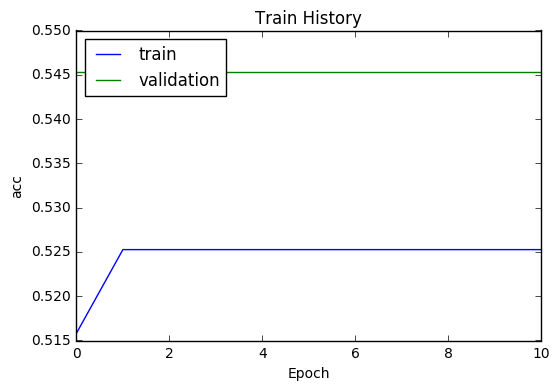

In [895]:
show_train_history(train_history,'acc','val_acc')

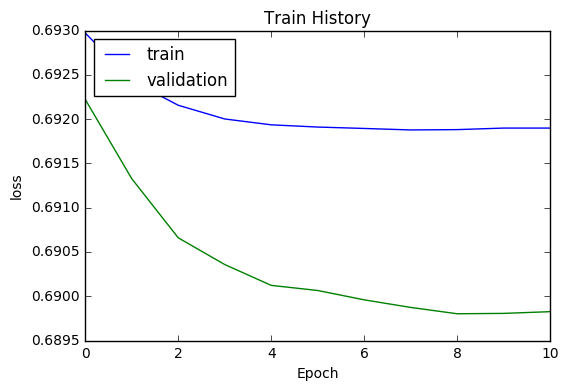

In [896]:
show_train_history(train_history,'loss','val_loss')

In [897]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

2233/2233 [==============================] - 1s 301us/step


In [898]:
scores[1]

0.521719659437153